In [ ]:
import numpy as np
import keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
import string
import os
from keras.preprocessing.text import Tokenizer
from keras import layers
from keras import models
from keras import preprocessing

from keras.datasets import imdb
from keras.preprocessing import sequence

In [58]:
def display_result(history):
    val_acc, val_loss = history.history.get('val_acc'), history.history.get('val_loss')
    tr_acc, tr_loss = history.history.get('acc'), history.history.get('loss')

    xs = range(1, len(tr_loss)+1)
    
    fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
    if val_acc is not None:
        ax[1].plot(xs, tr_acc, 'o-', label='train', alpha=.7)
        ax[1].plot(xs, val_acc, 'x--', label='val', alpha=.7)
        ax[1].set_xlabel('epochs')
        ax[1].set_ylabel('accuracy')
        ax[1].legend(loc='best')

    ax[0].plot(xs, tr_loss, 'o-', label='train', alpha=.7)
    ax[0].plot(xs, val_loss, 'x--', label='val', alpha=.7)
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('loss')
    ax[0].legend(loc='best')
    
    fig.tight_layout()
    plt.show()

In [5]:
list(string.printable)

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 ' ',
 '\t',
 '\n',
 '\r',
 '\x0b',
 '\x0c']

In [10]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']


tokenizer = Tokenizer(num_words=1000)

In [11]:
tokenizer.fit_on_texts(samples)

In [12]:
tokenizer.texts_to_sequences(samples)

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [50]:
tokenizer.texts_to_matrix(samples, mode='binary')

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [15]:
tokenizer.word_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

In [48]:
hash('abc') % 1000

545

In [ ]:
layers.Embedding()

#### Learning word embeddings with the embedding layer

In [55]:
max_feature = 10000
max_len = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_feature)

In [57]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [63]:
# mean lenght of the samples
np.mean([len(a) for a in x_train]), np.std([len(a) for a in x_train]), np.min([len(a) for a in x_train]), np.max([len(a) for a in x_train])

(238.71364, 176.49367364852034, 11, 2494)

In [64]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [65]:
# after padding each sample has length=20
np.mean([len(a) for a in x_train]), np.std([len(a) for a in x_train])

(20.0, 0.0)

In [71]:
word_dim = 8
max_word = 10000


K.clear_session()

model = models.Sequential()
model.add(layers.Embedding(input_dim=max_word, output_dim=word_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [73]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32, 
                    validation_split=.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 7s 342us/step - loss: 0.6743 - acc: 0.6073 - val_loss: 0.6291 - val_acc: 0.6876
Epoch 2/10
20000/20000 [==============================] - 6s 311us/step - loss: 0.5511 - acc: 0.7483 - val_loss: 0.5301 - val_acc: 0.7230
Epoch 3/10
20000/20000 [==============================] - 6s 292us/step - loss: 0.4650 - acc: 0.7862 - val_loss: 0.5010 - val_acc: 0.7428
Epoch 4/10
20000/20000 [==============================] - 6s 301us/step - loss: 0.4224 - acc: 0.8084 - val_loss: 0.4941 - val_acc: 0.7488
Epoch 5/10
20000/20000 [==============================] - 5s 238us/step - loss: 0.3939 - acc: 0.8237 - val_loss: 0.4939 - val_acc: 0.7546
Epoch 6/10
20000/20000 [==============================] - 5s 227us/step - loss: 0.3702 - acc: 0.8373 - val_loss: 0.4964 - val_acc: 0.7540
Epoch 7/10
20000/20000 [==============================] - 4s 222us/step - loss: 0.3492 - acc: 0.8500 - val_loss: 0.5017 - v

In [75]:
history.history.keys()

dict_keys(['acc', 'loss', 'val_loss', 'val_acc'])

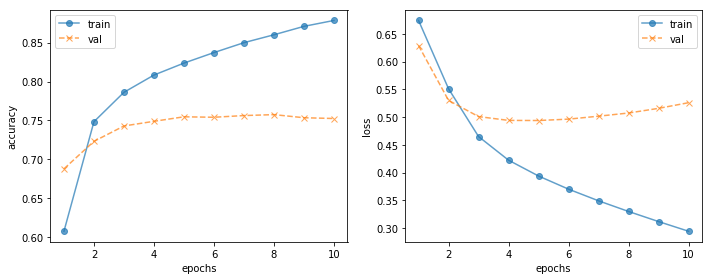

In [79]:
display_result(history)

#### Using pretrained word embeddings

In [97]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [81]:
imdb_dir = '/Users/LENOVO/Desktop/aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')

In [ ]:
# processing the albels of the raw IMDB data

In [90]:
texts = []
labels = []

for l, s in zip([0,1], ['neg', 'pos']):
    dir_path = os.path.join(train_dir, s)
    for file in os.listdir(dir_path):
        if file.endswith('.txt'):
            txt_path = os.path.join(dir_path, file)
            with open(txt_path, 'r', errors='ignore') as f:
                texts.append(f.read())
                labels.append(l)

In [95]:
len(texts), len(labels)

(25000, 25000)

In [169]:
# tokenize the data: word index

num_words = 10000       # most 10000 common word
max_length = 100        # first 100 word in the review
train_size = 500 #200        # small dataset for pretrained embedding
val_size = 10000

In [99]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(texts)

In [109]:
print("Found {:,} unique words".format(len(tokenizer.word_index)))

Found 88,584 unique words


In [103]:
sequences = tokenizer.texts_to_sequences(texts)

In [107]:
np.mean([len(a) for a in sequences])   # average length of each review

224.05292

In [110]:
data = pad_sequences(sequences, maxlen=max_length)

In [112]:
assert np.mean([len(a) for a in data]) == max_length

In [114]:
labels = np.asarray(labels)

In [115]:
data.shape, labels.shape

((25000, 100), (25000,))

In [118]:
# shuffle index
idx = np.random.permutation(data.shape[0])

data = data[idx]
labels = labels[idx]

In [170]:
x_train = data[:train_size]
y_train = labels[:train_size]
x_val = data[train_size:train_size+val_size]
y_val = labels[train_size:train_size+val_size]

x_train.shape, y_train.shape, x_val.shape, y_val.shape

((500, 100), (500,), (10000, 100), (10000,))

In [123]:
glove_path = os.path.join(imdb_dir, 'glove.6B.100d.txt')


In [133]:
# mapping word -> 100-vector
embeddings_index = {}

with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        line = line.split()
        word = line[0]
        vec = np.array(line[1:], dtype='float32')
        
        embeddings_index[word] = vec

In [135]:
print("Fond {:,} word vectors".format(len(embeddings_index)))

Fond 400,000 word vectors


In [138]:
# preparing the GloVe word-embedding matrix
vec_dim = 100

embedding_matrix = np.zeros(shape=(max_word, vec_dim))
for word, idx in tokenizer.word_index.items():
    if idx < max_word:
        vec = embeddings_index.get(word)
        if vec is not None:
            embedding_matrix[idx] = vec

In [139]:
embedding_matrix.shape

(10000, 100)

In [171]:
# defin a model
K.clear_session()

model = models.Sequential()
model.add(layers.Embedding(input_dim=max_word, 
                           output_dim=vec_dim, 
                           input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [172]:
# load pretrain embedding matrix and freeze it
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [173]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 320,065
Non-trainable params: 1,000,000
_________________________________________________________________


In [174]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [175]:
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_val, y_val))

Train on 500 samples, validate on 10000 samples
Epoch 1/10
500/500 [==============================] - 2s 3ms/step - loss: 1.1670 - acc: 0.5120 - val_loss: 0.6932 - val_acc: 0.4917
Epoch 2/10
500/500 [==============================] - 1s 3ms/step - loss: 0.6821 - acc: 0.5440 - val_loss: 0.6934 - val_acc: 0.5104
Epoch 3/10
500/500 [==============================] - 1s 3ms/step - loss: 0.7289 - acc: 0.5900 - val_loss: 0.6855 - val_acc: 0.5602
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 0.6070 - acc: 0.6600 - val_loss: 0.6735 - val_acc: 0.5771
Epoch 5/10
500/500 [==============================] - 1s 3ms/step - loss: 0.4503 - acc: 0.7880 - val_loss: 0.9728 - val_acc: 0.5111
Epoch 6/10
500/500 [==============================] - 1s 3ms/step - loss: 0.3250 - acc: 0.8780 - val_loss: 0.9501 - val_acc: 0.5031
Epoch 7/10
500/500 [==============================] - 1s 3ms/step - loss: 0.2846 - acc: 0.8980 - val_loss: 0.7529 - val_acc: 0.5747
Epoch 8/10
500/500 [========

In [176]:
model.save('pre_trained_glove_model.h5')

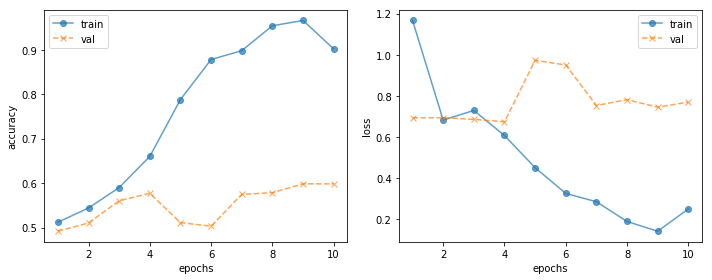

In [177]:
display_result(history)

In [178]:
# train without pretrained embedding
K.clear_session()

model = models.Sequential()
model.add(layers.Embedding(input_dim=max_word, 
                           output_dim=vec_dim, 
                           input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [179]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [180]:
history = model.fit(x_train, y_train, 
                    epochs=10, batch_size=32, 
                    validation_data=(x_val, y_val))

Train on 500 samples, validate on 10000 samples
Epoch 1/10
500/500 [==============================] - 2s 4ms/step - loss: 0.6961 - acc: 0.5260 - val_loss: 0.6914 - val_acc: 0.5207
Epoch 2/10
500/500 [==============================] - 1s 3ms/step - loss: 0.4578 - acc: 0.9740 - val_loss: 0.6876 - val_acc: 0.5449
Epoch 3/10
500/500 [==============================] - 1s 3ms/step - loss: 0.1849 - acc: 0.9860 - val_loss: 0.6996 - val_acc: 0.5419
Epoch 4/10
500/500 [==============================] - 1s 3ms/step - loss: 0.0567 - acc: 0.9980 - val_loss: 0.7023 - val_acc: 0.5560
Epoch 5/10
500/500 [==============================] - 1s 3ms/step - loss: 0.0195 - acc: 1.0000 - val_loss: 0.7198 - val_acc: 0.5561
Epoch 6/10
500/500 [==============================] - 1s 3ms/step - loss: 0.0080 - acc: 1.0000 - val_loss: 0.7584 - val_acc: 0.5531
Epoch 7/10
500/500 [==============================] - 1s 3ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.7614 - val_acc: 0.5578
Epoch 8/10
500/500 [========

display_result(history)

#### evaluate the pretrained embedding model on the test set

In [182]:
model.load_weights('pre_trained_glove_model.h5')

In [183]:
x_test = data[train_size+val_size:]
y_test = labels[train_size+val_size:]

x_test.shape, y_test.shape

((14500, 100), (14500,))

In [184]:
model.evaluate(x_test, y_test, batch_size=32)

14500/14500 [==============================] - 2s 146us/step


[0.7818139230465067, 0.5942068965517241]

### RNN

#### Numpy implementation of a simple RNN: forward pass

In [192]:
import numpy as np

num_steps = 100
input_dim = 32
output_dim = 64

inputs = np.random.random(size=(num_steps, input_dim))
outputs = []
current_state = np.zeros(shape=(output_dim,))

W = np.random.random(size=(output_dim, input_dim))
U = np.random.random(size=(output_dim, output_dim))
b = np.random.random(size=(output_dim,))

for t in range(num_steps):
    
    output_t = np.tanh(np.dot(W, inputs[t]) + np.dot(U, current_state) + b)
    
    outputs.append(output_t)
    current_state = output_t
    
final_outputs = np.asarray(outputs)

In [193]:
final_outputs

array([[0.99999995, 0.99999989, 0.99999728, ..., 0.99999987, 0.99999995,
        0.99999998],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [195]:
final_outputs.shape

(100, 64)

#### Keras: SimpleRNN

In [206]:
from keras.layers import SimpleRNN, Embedding, Dense
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.datasets import imdb

In [199]:
K.clear_session()

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32))
model.add(SimpleRNN(units=32, return_sequences=False))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [200]:
K.clear_session()

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32))
model.add(SimpleRNN(units=32, return_sequences=True))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [201]:
K.clear_session()

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=32, return_sequences=False))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [203]:
max_features = 10000
embed_dim = 32
max_length = 500
batch_size = 32


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [211]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000, 500), (25000,), (25000, 500), (25000,))

In [210]:
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

In [208]:
K.clear_session()

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embed_dim))
model.add(SimpleRNN(units=32, return_sequences=False))
model.add(Dense(units=1, activation='sigmoid'))

In [209]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [212]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [213]:
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=batch_size, 
                    validation_split=.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 118s 6ms/step - loss: 0.5147 - acc: 0.7328 - val_loss: 0.5693 - val_acc: 0.7150
Epoch 2/10
20000/20000 [==============================] - 107s 5ms/step - loss: 0.3324 - acc: 0.8650 - val_loss: 0.3758 - val_acc: 0.8404
Epoch 3/10
20000/20000 [==============================] - 107s 5ms/step - loss: 0.2948 - acc: 0.8822 - val_loss: 0.3400 - val_acc: 0.8582
Epoch 4/10
20000/20000 [==============================] - 106s 5ms/step - loss: 0.2301 - acc: 0.9125 - val_loss: 0.4109 - val_acc: 0.8356
Epoch 5/10
20000/20000 [==============================] - 111s 6ms/step - loss: 0.1811 - acc: 0.9313 - val_loss: 0.4148 - val_acc: 0.8216
Epoch 6/10
20000/20000 [==============================] - 226s 11ms/step - loss: 0.1452 - acc: 0.9469 - val_loss: 0.4495 - val_acc: 0.8354
Epoch 7/10
20000/20000 [==============================] - 236s 12ms/step - loss: 0.1251 - acc: 0.9538 - val_loss: 0.5784 -

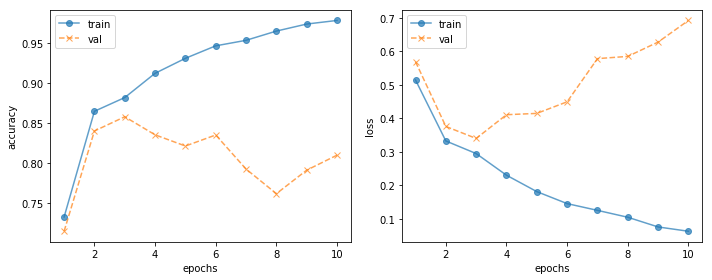

In [214]:
display_result(history)

#### Keras: LSTM

In [14]:
from keras.preprocessing import sequence
from keras.layers import LSTM

In [9]:
mx_len = 500
num_words = 10000

In [10]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [11]:
x_train = sequence.pad_sequences(x_train, maxlen=mx_len)
x_test = sequence.pad_sequences(x_test, maxlen=mx_len)

In [13]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((25000, 500), (25000, 500), (25000,), (25000,))

In [17]:
K.clear_session()

model = models.Sequential()
model.add(layers.Embedding(input_dim=num_words, output_dim=32))
model.add(LSTM(units=32, return_sequences=False))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [19]:
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=128, 
                    validation_split=.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 140s 7ms/step - loss: 0.4978 - acc: 0.7692 - val_loss: 0.4043 - val_acc: 0.8320
Epoch 2/10
20000/20000 [==============================] - 132s 7ms/step - loss: 0.2941 - acc: 0.8828 - val_loss: 0.3003 - val_acc: 0.8752
Epoch 3/10
20000/20000 [==============================] - 133s 7ms/step - loss: 0.2376 - acc: 0.9103 - val_loss: 0.2997 - val_acc: 0.8860
Epoch 4/10
20000/20000 [==============================] - 148s 7ms/step - loss: 0.2056 - acc: 0.9259 - val_loss: 0.2893 - val_acc: 0.8812
Epoch 5/10
20000/20000 [==============================] - 127s 6ms/step - loss: 0.1772 - acc: 0.9346 - val_loss: 0.2899 - val_acc: 0.8838
Epoch 6/10
20000/20000 [==============================] - 146s 7ms/step - loss: 0.1620 - acc: 0.9419 - val_loss: 0.3063 - val_acc: 0.8838
Epoch 7/10
20000/20000 [==============================] - 126s 6ms/step - loss: 0.1421 - acc: 0.9498 - val_loss: 0.6736 - v

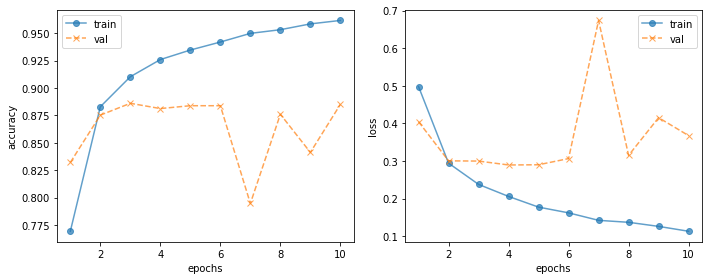

In [20]:
display_result(history)

#### A temperature-forecasting problem

* timeseries dataset: from www.bgc-jena.mpg.de/wetter
* download link: https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip

In [39]:
zip_path = '/Users/LENOVO/Downloads/jena_climate_2009_2016.csv.zip'

In [40]:
data = pd.read_csv(zip_path, compression='zip', parse_dates=[0])

In [41]:
data.set_index('Date Time', inplace=True, drop=True)

In [7]:
data.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420551 entries, 2009-01-01 00:10:00 to 2017-01-01 00:00:00
Data columns (total 14 columns):
p (mbar)           420551 non-null float64
T (degC)           420551 non-null float64
Tpot (K)           420551 non-null float64
Tdew (degC)        420551 non-null float64
rh (%)             420551 non-null float64
VPmax (mbar)       420551 non-null float64
VPact (mbar)       420551 non-null float64
VPdef (mbar)       420551 non-null float64
sh (g/kg)          420551 non-null float64
H2OC (mmol/mol)    420551 non-null float64
rho (g/m**3)       420551 non-null float64
wv (m/s)           420551 non-null float64
max. wv (m/s)      420551 non-null float64
wd (deg)           420551 non-null float64
dtypes: float64(14)
memory usage: 48.1 MB


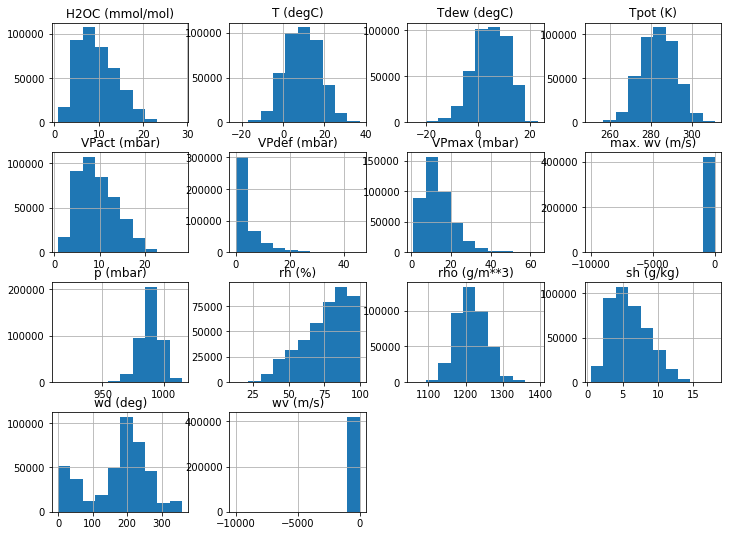

In [9]:
_ = data.hist(figsize=(12, 9))

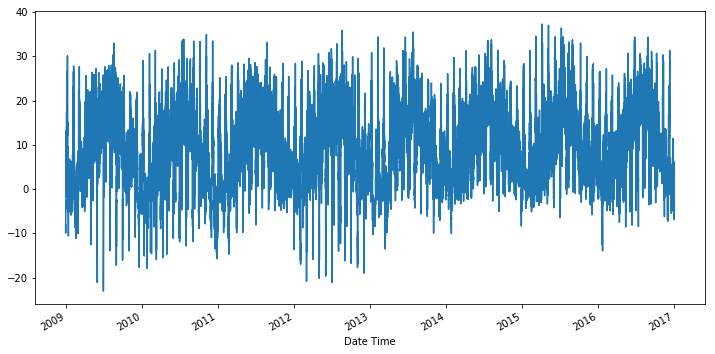

In [10]:
data['T (degC)'].plot(figsize=(12, 6))

Text(0.5,1,'Temperature of the first 10 days')

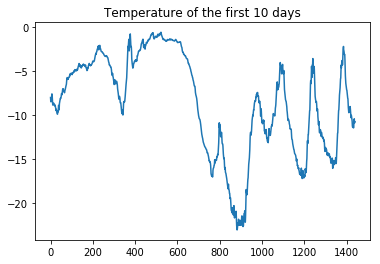

In [11]:
plt.plot(data.iloc[:1440, 1].values)
plt.title('Temperature of the first 10 days')

In [42]:
# preparing the data

# given 5 previous days temperatures -> predict tomorrow temperature
record_per_day = 144              # data every 10 minutes
lookback = 5 * record_per_day     # 5 days back
steps = 6                         # observations will be sampled at one data point per hour
delay = 1 * record_per_day        # targets will be 24 hours in the future

In [43]:
# train data: first 200000 samples
# Normalizing data
#####################################

float_data = data.values.copy()
mean = float_data[:200000, :].mean(axis=0)
float_data -= mean
std = float_data[:200000, :].std(axis=0)
float_data /= std

In [44]:
print(float_data[:200000,:].mean(axis=0))
print(float_data[:200000,:].std(axis=0))

[ 2.35142852e-12 -6.28273600e-15  7.46772859e-13 -1.21087956e-14
  2.42951509e-14  4.34444314e-15 -6.97213176e-15 -1.16579003e-14
  2.78895790e-14  7.98244804e-16 -1.30972425e-13  1.37250925e-14
 -5.88101390e-14 -2.93813751e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [45]:
def generator(data, lookback, delay, min_index=0, max_index=None, 
              shuffle=False, batch_size=128, steps=6, reverse=False):
    
    if max_index is None:
        max_index = len(data) - delay - 1
    current_index = min_index + lookback
    
    while True:
        if shuffle:
            idx = np.random.randint(min_index+lookback, 
                                    max_index, size=batch_size)
        else:
            if current_index + batch_size >= max_index:
                current_index = min_index + lookback
            
            idx = range(current_index, current_index+batch_size)
            current_index += batch_size
        
        samples = np.zeros((len(idx), lookback//steps, data.shape[-1]))
        targets = np.zeros((len(idx),))
        for i, row in enumerate(idx):
            samples[i] = data[row-lookback:row:steps]
            targets[i] = data[row+delay][1]
            
        if reverse:
            yield samples[:, ::-1, :], targets
        else:
            yield samples, targets

In [20]:
###########################################
# Preparing Train/Validation/Test dataset #
###########################################

lookback = record_per_day * 10     # 10 day lookback
steps = 6                          # sampling every 1 hour
delay = record_per_day * 1         # predict tomorrow temperature
batch_size = 128

train_gen = generator(float_data, lookback, delay, shuffle=True, 
                      min_index=0, max_index=200000, 
                      batch_size=128, steps=steps)

val_gen = generator(float_data, lookback, delay,
                     min_index=200001, max_index=300000,
                     batch_size=batch_size, steps=steps)

test_gen = generator(float_data, lookback, delay,
                     min_index=300001, max_index=None,
                     batch_size=batch_size, steps=steps)

In [21]:

train_gen_rev = generator(float_data, lookback, delay, shuffle=True, 
                      min_index=0, max_index=200000, 
                      batch_size=128, steps=steps, reverse=True)

val_gen_rev = generator(float_data, lookback, delay,
                     min_index=200001, max_index=300000,
                     batch_size=batch_size, steps=steps, reverse=True)


In [15]:
# num steps per epoch
val_steps = (300000 - 200001 - lookback) // batch_size  
test_steps = (len(float_data) - 300001 - lookback) // batch_size  


In [22]:
# baseline model                                     #
# : predict by using temperature of the previous day #
######################################################
total_sample = 0
maes = []
for i in range(val_steps):
    samples, targets = next(val_gen)
    total_sample += len(targets)
    preds = samples[:, -1, 1]
    mae = np.mean(np.abs(preds - targets))
    maes.append(mae)
print(np.mean(maes))

0.2897359729905486


In [53]:
celsius_mae = np.mean(maes) * std[1]
celsius_mae

2.5650540787337666

In [65]:
# Try: basic machine learning approch #
# Fully connected model               #
#######################################

K.clear_session()

model = models.Sequential()
model.add(layers.Flatten(input_shape=(lookback//steps, float_data.shape[-1])))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=1, activation=None))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3360)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                107552    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 107,585
Trainable params: 107,585
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss='mae', optimizer='rmsprop')
history = model.fit_generator(train_gen, steps_per_epoch=500, 
                              epochs=20, 
                              validation_data=val_gen, validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 11s 23ms/step - loss: 1.3929 - val_loss: 0.6399
Epoch 2/20
500/500 [==============================] - 11s 22ms/step - loss: 0.4627 - val_loss: 0.3621
Epoch 3/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2948 - val_loss: 0.3113
Epoch 4/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2667 - val_loss: 0.2982
Epoch 5/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2553 - val_loss: 0.3271
Epoch 6/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2471 - val_loss: 0.3134
Epoch 7/20
500/500 [==============================] - 11s 21ms/step - loss: 0.2387 - val_loss: 0.3190
Epoch 8/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2336 - val_loss: 0.3175
Epoch 9/20
500/500 [==============================] - 11s 21ms/step - loss: 0.2286 - val_loss: 0.3209
Epoch 10/20
500/500 [==============================] - 11s 21ms/step - loss: 0.223

In [23]:
def display_result(history):
    tr_loss = history.history.get('loss')
    val_loss = history.history.get('val_loss')
    xs = range(1, len(tr_loss)+1)
    
    plt.plot(xs, tr_loss, 'o-', label='train')
    plt.plot(xs, val_loss, 'x--', label='val')
    plt.xlabel('epochs')
    plt.ylabel('MAE')
    plt.legend(loc='best')
    plt.title('Training & Validation Loss')
    plt.show()

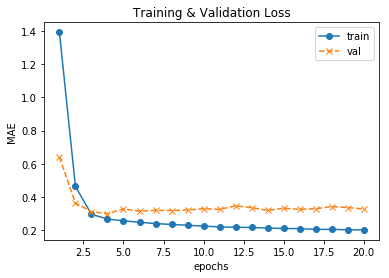

In [67]:
display_result(history)

In [68]:
# Training and evaluating a GRU-based model #
#############################################

K.clear_session()

model = models.Sequential()
model.add(layers.GRU(units=32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(units=1, activation=None))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                4512      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(loss='mae', optimizer='rmsprop')
history = model.fit_generator(train_gen, 
                              steps_per_epoch=500, 
                              epochs=20, 
                              validation_data=val_gen, 
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 232s 463ms/step - loss: 0.3000 - val_loss: 0.2711
Epoch 2/20
500/500 [==============================] - 229s 459ms/step - loss: 0.2868 - val_loss: 0.2706
Epoch 3/20
500/500 [==============================] - 226s 452ms/step - loss: 0.2777 - val_loss: 0.2666
Epoch 4/20
500/500 [==============================] - 229s 457ms/step - loss: 0.2751 - val_loss: 0.2643
Epoch 5/20
500/500 [==============================] - 238s 476ms/step - loss: 0.2681 - val_loss: 0.2655
Epoch 6/20
500/500 [==============================] - 218s 436ms/step - loss: 0.2627 - val_loss: 0.2652
Epoch 7/20
500/500 [==============================] - 235s 470ms/step - loss: 0.2572 - val_loss: 0.2720
Epoch 8/20
500/500 [==============================] - 242s 483ms/step - loss: 0.2530 - val_loss: 0.2772
Epoch 9/20
500/500 [==============================] - 349s 699ms/step - loss: 0.2479 - val_loss: 0.2726
Epoch 10/20
500/500 [==============================] - 415s 831m

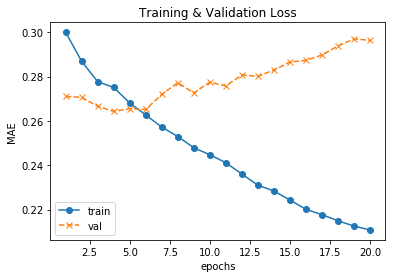

In [70]:
display_result(history)

In [72]:
# Using dropout-regularized GRU-based model #
#############################################

K.clear_session()
model = models.Sequential()
model.add(layers.GRU(units=32, 
                     input_shape=(None, float_data.shape[-1]), 
                     dropout=.2, 
                     recurrent_dropout=.2))

model.add(layers.Dense(units=1, activation=None))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                4512      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


Wall time: 0 ns
Epoch 1/40
500/500 [==============================] - 195s 389ms/step - loss: 0.3379 - val_loss: 0.2792
Epoch 2/40
500/500 [==============================] - 188s 376ms/step - loss: 0.3174 - val_loss: 0.2781
Epoch 3/40
500/500 [==============================] - 194s 389ms/step - loss: 0.3102 - val_loss: 0.2788
Epoch 4/40
500/500 [==============================] - 203s 405ms/step - loss: 0.3051 - val_loss: 0.2669
Epoch 5/40
500/500 [==============================] - 187s 374ms/step - loss: 0.3012 - val_loss: 0.2664
Epoch 6/40
500/500 [==============================] - 191s 382ms/step - loss: 0.2988 - val_loss: 0.2695
Epoch 7/40
500/500 [==============================] - 192s 383ms/step - loss: 0.2960 - val_loss: 0.2650
Epoch 8/40
500/500 [==============================] - 200s 400ms/step - loss: 0.2932 - val_loss: 0.2633
Epoch 9/40
500/500 [==============================] - 205s 411ms/step - loss: 0.2932 - val_loss: 0.2662
Epoch 10/40
500/500 [===========================

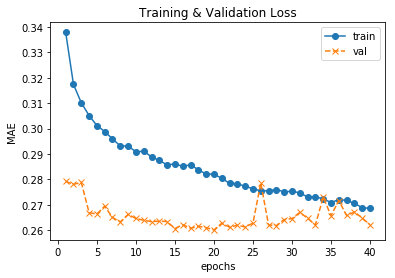

In [73]:
%time
model.compile(loss='mae', optimizer='rmsprop')
history = model.fit_generator(train_gen, 
                              steps_per_epoch=500, 
                              validation_data=val_gen, 
                              validation_steps=val_steps,
                              epochs=40)

display_result(history)

In [74]:
model.save('temperature_forcasting_gru_dropout.h5')

In [43]:
# Stacking recurrent layers #
#############################
K.clear_session()

model = models.Sequential()
model.add(layers.GRU(units=32, 
                     input_shape=(None, float_data.shape[-1]), 
                     dropout=.1, 
                     recurrent_dropout=.5, 
                     return_sequences=True))
model.add(layers.GRU(units=64, activation='relu',
                     dropout=.1,
                     recurrent_dropout=.5))
model.add(layers.Dense(units=1, activation=None))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, None, 32)          4512      
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                18624     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 23,201
Trainable params: 23,201
Non-trainable params: 0
_________________________________________________________________


Epoch 1/40
500/500 [==============================] - 368s 736ms/step - loss: 0.3366 - val_loss: 0.2856
Epoch 2/40
500/500 [==============================] - 372s 744ms/step - loss: 0.3134 - val_loss: 0.2727
Epoch 3/40
500/500 [==============================] - 378s 756ms/step - loss: 0.3062 - val_loss: 0.2689
Epoch 4/40
500/500 [==============================] - 371s 743ms/step - loss: 0.3001 - val_loss: 0.2679
Epoch 5/40
500/500 [==============================] - 400s 800ms/step - loss: 0.2967 - val_loss: 0.2692
Epoch 6/40
500/500 [==============================] - 405s 809ms/step - loss: 0.2932 - val_loss: 0.2702
Epoch 7/40
500/500 [==============================] - 407s 815ms/step - loss: 0.2894 - val_loss: 0.2714
Epoch 8/40
500/500 [==============================] - 407s 815ms/step - loss: 0.2885 - val_loss: 0.2680
Epoch 9/40
500/500 [==============================] - 407s 814ms/step - loss: 0.2851 - val_loss: 0.2708
Epoch 10/40
500/500 [==============================] - 406s 812m

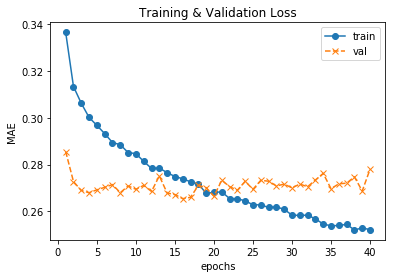

In [44]:
model.compile(loss='mae', 
              optimizer='rmsprop')

history = model.fit_generator(train_gen, 
                              steps_per_epoch=500, 
                              validation_data=val_gen, 
                              validation_steps=val_steps, 
                              epochs=40)

model.save('temperature_forcasting_grux2_dropout.h5')
display_result(history)

In [18]:
# Bidirectional RNN #
#####################

K.clear_session()
model = models.Sequential()
model.add(layers.GRU(units=32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(units=1, activation=None))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                4512      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
500/500 [==============================] - 230s 460ms/step - loss: 0.4769 - val_loss: 0.4850
Epoch 2/20
500/500 [==============================] - 222s 444ms/step - loss: 0.4358 - val_loss: 0.4713
Epoch 3/20
500/500 [==============================] - 222s 444ms/step - loss: 0.3994 - val_loss: 0.4533
Epoch 4/20
500/500 [==============================] - 222s 444ms/step - loss: 0.3795 - val_loss: 0.4432
Epoch 5/20
500/500 [==============================] - 210s 420ms/step - loss: 0.3542 - val_loss: 0.4414
Epoch 6/20
500/500 [==============================] - 209s 417ms/step - loss: 0.3284 - val_loss: 0.4486
Epoch 7/20
500/500 [==============================] - 194s 388ms/step - loss: 0.3151 - val_loss: 0.4574
Epoch 8/20
500/500 [==============================] - 199s 398ms/step - loss: 0.3057 - val_loss: 0.4529
Epoch 9/20
500/500 [==============================] - 198s 396ms/step - loss: 0.2977 - val_loss: 0.4583
Epoch 10/20
500/500 [==============================] - 196s 393m

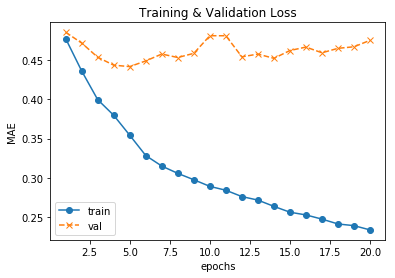

In [24]:
model.compile(loss='mae', optimizer='rmsprop')
history = model.fit_generator(train_gen_rev, steps_per_epoch=500, 
                              validation_data=val_gen_rev, 
                              validation_steps=val_steps,
                              epochs=20)

display_result(history)

In [ ]:
model.save('temperature_forecasting_gru_reverse.h5')

In [4]:
# LSTM using reverse sequence on imdb dataset #
###############################################

n_words = 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=n_words, maxlen=max_len)

In [5]:
# to reverse sequence
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

In [6]:
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((25000, 500), (20947, 500), (25000,), (20947,))

In [8]:
K.clear_session()

model = models.Sequential()
model.add(layers.Embedding(input_dim=n_words, output_dim=128))
model.add(layers.LSTM(units=32))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,300,641
Trainable params: 1,300,641
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

history = model.fit(x_train, y_train, 
                    epochs=10, batch_size=128, 
                    validation_split=.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 131s 7ms/step - loss: 0.4918 - acc: 0.7660 - val_loss: 0.4183 - val_acc: 0.8220
Epoch 2/10
20000/20000 [==============================] - 122s 6ms/step - loss: 0.3007 - acc: 0.8864 - val_loss: 0.3546 - val_acc: 0.8768
Epoch 3/10
20000/20000 [==============================] - 123s 6ms/step - loss: 0.2515 - acc: 0.9048 - val_loss: 0.3258 - val_acc: 0.8798
Epoch 4/10
20000/20000 [==============================] - 122s 6ms/step - loss: 0.2093 - acc: 0.9254 - val_loss: 0.3582 - val_acc: 0.8756
Epoch 5/10
20000/20000 [==============================] - 124s 6ms/step - loss: 0.1729 - acc: 0.9398 - val_loss: 0.3730 - val_acc: 0.8586
Epoch 6/10
20000/20000 [==============================] - 123s 6ms/step - loss: 0.1627 - acc: 0.9447 - val_loss: 0.3739 - val_acc: 0.8734
Epoch 7/10
20000/20000 [==============================] - 127s 6ms/step - loss: 0.1457 - acc: 0.9494 - val_loss: 0.3631 - v

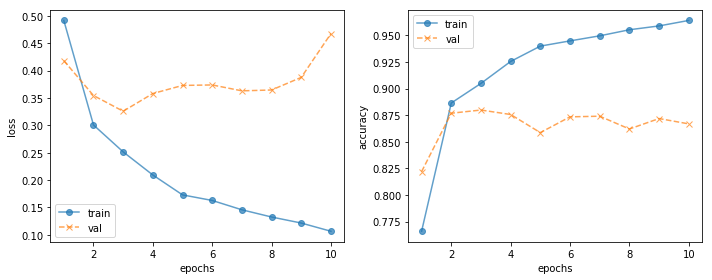

In [12]:
model.save('imdb_lstm_reverse.h5')
display_result(history)

In [48]:
# bidirectional LSTM: imdb data #
#################################

K.clear_session()

model = models.Sequential()
model.add(layers.Embedding(input_dim=n_words, output_dim=32))
model.add(layers.Bidirectional(layers.LSTM(units=32)))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 231s 12ms/step - loss: 0.5568 - acc: 0.7235 - val_loss: 0.5372 - val_acc: 0.7866
Epoch 2/10
20000/20000 [==============================] - 230s 12ms/step - loss: 0.3670 - acc: 0.8553 - val_loss: 0.3586 - val_acc: 0.8564
Epoch 3/10
20000/20000 [==============================] - 230s 11ms/step - loss: 0.2885 - acc: 0.8926 - val_loss: 0.3427 - val_acc: 0.8760
Epoch 4/10
20000/20000 [==============================] - 230s 11ms/step - loss: 0.2417 - acc: 0.9141 - val_loss: 0.3144 - val_acc: 0.8740
Epoch 5/10
20000/20000 [==============================] - 229s 11ms/step - loss: 0.2207 - acc: 0.9238 - val_loss: 0.3341 - val_acc: 0.8630
Epoch 6/10
20000/20000 [==============================] - 234s 12ms/step - loss: 0.1832 - acc: 0.9356 - val_loss: 0.3650 - val_acc: 0.8514
Epoch 7/10
20000/20000 [==============================] - 230s 12ms/step - loss: 0.1633 - acc: 0.9433 - val_loss: 0.3

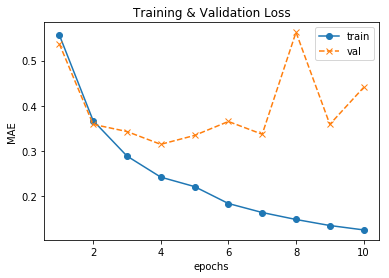

In [50]:
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=128, 
                    validation_split=0.2)

display_result(history)

In [51]:
model.save('imdb_bidirection_lstm.h5')

In [52]:
# bidirection GRU: temperature dataset #
########################################

K.clear_session()
model = models.Sequential()
model.add(layers.Bidirectional(layers.GRU(units=32), 
                               input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(units=1, activation=None))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 64)                9024      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss='mae', optimizer='rmsprop')

history = model.fit_generator(train_gen, steps_per_epoch=500, 
                              validation_data=val_gen, validation_steps=val_steps,
                              epochs=40)

Epoch 1/40
500/500 [==============================] - 334s 668ms/step - loss: 0.2914 - val_loss: 0.2712
Epoch 2/40
500/500 [==============================] - 331s 662ms/step - loss: 0.2739 - val_loss: 0.2625
Epoch 3/40
500/500 [==============================] - 332s 664ms/step - loss: 0.2663 - val_loss: 0.2650
Epoch 4/40
500/500 [==============================] - 332s 664ms/step - loss: 0.2600 - val_loss: 0.2656
Epoch 5/40
500/500 [==============================] - 331s 662ms/step - loss: 0.2543 - val_loss: 0.2660
Epoch 6/40
500/500 [==============================] - 332s 664ms/step - loss: 0.2476 - val_loss: 0.2735
Epoch 7/40
500/500 [==============================] - 331s 662ms/step - loss: 0.2408 - val_loss: 0.2705
Epoch 8/40
500/500 [==============================] - 332s 664ms/step - loss: 0.2367 - val_loss: 0.2766
Epoch 9/40
500/500 [==============================] - 332s 664ms/step - loss: 0.2294 - val_loss: 0.2856
Epoch 10/40
500/500 [==============================] - 333s 665m

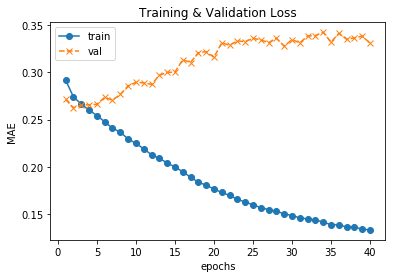

In [54]:
model.save('temperature_forecasting_biGRU.h5')
display_result(history)

### Sequence processing with convnets

In [18]:
from keras.datasets import imdb
from keras import layers, models, optimizers
from keras.preprocessing import sequence
import keras.backend as K

In [15]:
n_words = 10000
mx_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=n_words)

In [16]:
x_train = sequence.pad_sequences(x_train, maxlen=mx_len)
x_test = sequence.pad_sequences(x_test, maxlen=mx_len)

In [17]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000, 500), (25000,), (25000, 500), (25000,))

In [35]:
# Train simple conv1D on imdb dataset #
#######################################
K.clear_session()

model = models.Sequential()
model.add(layers.Embedding(input_dim=n_words, output_dim=128, input_length=mx_len))
model.add(layers.Conv1D(filters=32, kernel_size=7, activation='relu'))
model.add(layers.MaxPool1D(pool_size=5))
model.add(layers.Conv1D(filters=32, kernel_size=7, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(units=1, activation='sigmoid'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(1e-4), 
              metrics=['acc'])

In [37]:
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=128, 
                    validation_split=.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 6s 320us/step - loss: 0.6920 - acc: 0.5247 - val_loss: 0.6908 - val_acc: 0.5290
Epoch 2/10
20000/20000 [==============================] - 5s 264us/step - loss: 0.6842 - acc: 0.6610 - val_loss: 0.6833 - val_acc: 0.6370
Epoch 3/10
20000/20000 [==============================] - 5s 261us/step - loss: 0.6673 - acc: 0.7608 - val_loss: 0.6558 - val_acc: 0.7406
Epoch 4/10
20000/20000 [==============================] - 5s 267us/step - loss: 0.6132 - acc: 0.7912 - val_loss: 0.5717 - val_acc: 0.7962
Epoch 5/10
20000/20000 [==============================] - 5s 257us/step - loss: 0.5022 - acc: 0.8268 - val_loss: 0.4545 - val_acc: 0.8260
Epoch 6/10
20000/20000 [==============================] - 5s 261us/step - loss: 0.3899 - acc: 0.8550 - val_loss: 0.3755 - val_acc: 0.8462
Epoch 7/10
20000/20000 [==============================] - 5s 258us/step - loss: 0.3202 - acc: 0.8764 - val_loss: 0.3394 - v

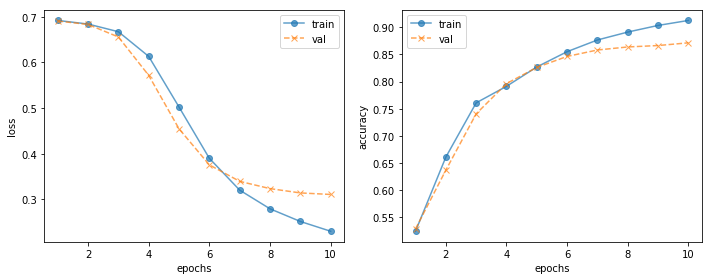

In [38]:
display_result(history)

In [67]:
lookback = 144*5    # 5 days
delay = 144         # 1 days
steps = 6           # every hour

train_gen = generator(float_data, 
                      lookback=lookback, 
                      delay=delay, 
                      min_index=0, 
                      max_index=200000, 
                      shuffle=True, 
                      batch_size=128, 
                      steps=steps)

val_gen = generator(float_data, 
                    lookback=lookback, 
                    delay=delay, 
                    min_index=200001, 
                    max_index=300000, 
                    steps=steps)

test_gen = generator(float_data, 
                    lookback=lookback, 
                    delay=delay, 
                    min_index=300001, 
                    max_index=None, 
                    steps=steps)


val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

In [68]:
# Training a simple 1D convnet on the Jena dataset #
####################################################


K.clear_session()

model = models.Sequential()
model.add(layers.Conv1D(filters=32, kernel_size=5, activation='relu', 
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPool1D(pool_size=3))
model.add(layers.Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(layers.MaxPool1D(pool_size=3))
model.add(layers.Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(units=1, activation=None))

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total para

In [70]:
model.compile(loss='mae', optimizer=optimizers.RMSprop())

In [71]:
history = model.fit_generator(train_gen, 
                              steps_per_epoch=500, 
                              epochs=20, 
                              validation_data=val_gen, 
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 9s 18ms/step - loss: 0.3922 - val_loss: 0.4190
Epoch 2/20
500/500 [==============================] - 7s 14ms/step - loss: 0.3278 - val_loss: 0.4003
Epoch 3/20
500/500 [==============================] - 7s 14ms/step - loss: 0.3022 - val_loss: 0.3945
Epoch 4/20
500/500 [==============================] - 6s 13ms/step - loss: 0.2828 - val_loss: 0.3914
Epoch 5/20
500/500 [==============================] - 7s 13ms/step - loss: 0.2674 - val_loss: 0.4082
Epoch 6/20
500/500 [==============================] - 7s 13ms/step - loss: 0.2557 - val_loss: 0.4060
Epoch 7/20
500/500 [==============================] - 7s 15ms/step - loss: 0.2478 - val_loss: 0.4150
Epoch 8/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2399 - val_loss: 0.4025
Epoch 9/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2352 - val_loss: 0.4051
Epoch 10/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2283 - val_lo

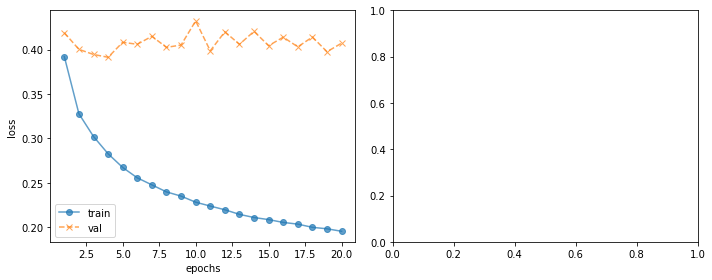

In [72]:
display_result(history)

In [73]:
lookback = 144*5    # 5 days
delay = 144         # 1 days
steps = 3           # every 0.5 hour   (increase sampling frequency)

train_gen = generator(float_data, 
                      lookback=lookback, 
                      delay=delay, 
                      min_index=0, 
                      max_index=200000, 
                      shuffle=True, 
                      batch_size=128, 
                      steps=steps)

val_gen = generator(float_data, 
                    lookback=lookback, 
                    delay=delay, 
                    min_index=200001, 
                    max_index=300000, 
                    steps=steps)

test_gen = generator(float_data, 
                    lookback=lookback, 
                    delay=delay, 
                    min_index=300001, 
                    max_index=None, 
                    steps=steps)


val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

In [74]:
# Training: combine conv1D and RNN-GRU #
########################################

K.clear_session()

model = models.Sequential()
model.add(layers.Conv1D(filters=32, kernel_size=5, activation='relu', 
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPool1D(pool_size=3))
model.add(layers.Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(layers.GRU(units=32))
model.add(layers.Dense(units=1, activation=None))

In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(loss='mae', optimizer='rmsprop')
history = model.fit_generator(train_gen, steps_per_epoch=500, 
                              validation_data=val_gen, validation_steps=val_steps,
                              epochs=20)

model.save('temperature_forecasting_conv1d_GRU.h5')

Epoch 1/20
500/500 [==============================] - 59s 118ms/step - loss: 0.3230 - val_loss: 0.2791
Epoch 2/20
500/500 [==============================] - 58s 117ms/step - loss: 0.2888 - val_loss: 0.2774
Epoch 3/20
500/500 [==============================] - 59s 118ms/step - loss: 0.2729 - val_loss: 0.2824
Epoch 4/20
500/500 [==============================] - 58s 117ms/step - loss: 0.2604 - val_loss: 0.2902
Epoch 5/20
500/500 [==============================] - 59s 117ms/step - loss: 0.2483 - val_loss: 0.2862
Epoch 6/20
500/500 [==============================] - 58s 116ms/step - loss: 0.2377 - val_loss: 0.2913
Epoch 7/20
500/500 [==============================] - 58s 117ms/step - loss: 0.2279 - val_loss: 0.3004
Epoch 8/20
500/500 [==============================] - 57s 115ms/step - loss: 0.2177 - val_loss: 0.3125
Epoch 9/20
500/500 [==============================] - 57s 114ms/step - loss: 0.2087 - val_loss: 0.3187
Epoch 10/20
500/500 [==============================] - 57s 114ms/step - l

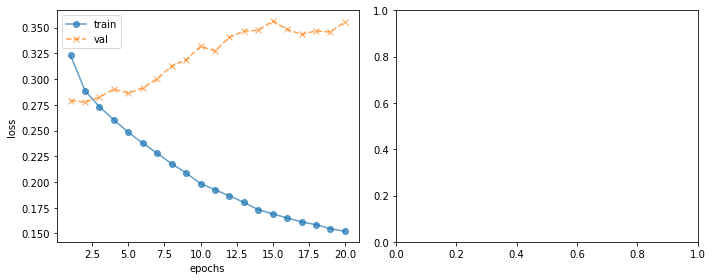

In [77]:
display_result(history)

In [78]:
# with dropout
K.clear_session()

model = models.Sequential()
model.add(layers.Conv1D(filters=32, kernel_size=5, activation='relu', 
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPool1D(pool_size=3))
model.add(layers.Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(layers.GRU(units=32, dropout=.1, recurrent_dropout=.5))
model.add(layers.Dense(units=1, activation=None))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(loss='mae', optimizer='rmsprop')
history = model.fit_generator(train_gen, 
                              steps_per_epoch=500, 
                              epochs=20, 
                              validation_data=val_gen, 
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 69s 139ms/step - loss: 0.3386 - val_loss: 0.2993
Epoch 2/20
500/500 [==============================] - 68s 136ms/step - loss: 0.3077 - val_loss: 0.2830
Epoch 3/20
500/500 [==============================] - 72s 144ms/step - loss: 0.2965 - val_loss: 0.2727
Epoch 4/20
500/500 [==============================] - 72s 144ms/step - loss: 0.2875 - val_loss: 0.2770
Epoch 5/20
500/500 [==============================] - 72s 144ms/step - loss: 0.2809 - val_loss: 0.2667
Epoch 6/20
500/500 [==============================] - 72s 144ms/step - loss: 0.2746 - val_loss: 0.2721
Epoch 7/20
500/500 [==============================] - 72s 144ms/step - loss: 0.2682 - val_loss: 0.2791
Epoch 8/20
500/500 [==============================] - 72s 145ms/step - loss: 0.2628 - val_loss: 0.2784
Epoch 9/20
500/500 [==============================] - 73s 146ms/step - loss: 0.2590 - val_loss: 0.2754
Epoch 10/20
500/500 [==============================] - 73s 146ms/step - l

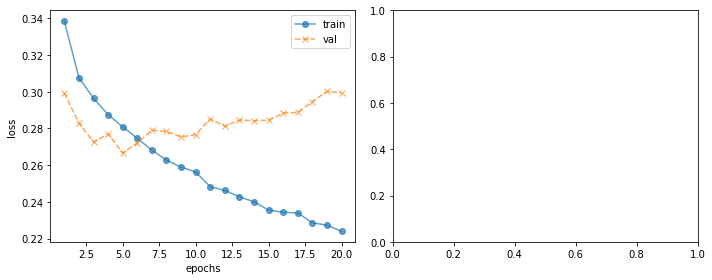

In [80]:
model.save('temperature_forecasting_conv1d_GRU_with_dropout.h5')

display_result(history)